In [1]:
import numpy as np
from fireworks.ic import ic_two_body
import matplotlib.pyplot as plt
from fireworks.nbodylib.integrators import integrator_euler, integrator_leapfrog, integrator_rungekutta, integrator_tsunami
from fireworks.nbodylib.dynamics import acceleration_direct_vectorized , acceleration_direct, acceleration_pyfalcon, acceleration_jerk_direct
from fireworks.particles import Particles
from typing import Optional, Tuple, Callable, Union
from numpy.random import random, seed
from fireworks.particles import Particles
from fireworks.nbodylib.timesteps import adaptive_timestep_simple, adaptive_timestep_r

from mpl_toolkits.mplot3d import Axes3D

In [2]:
tevolve = 65
position = np.array([[0.,0.,0.],[0.5, 0.866,0],[1,0,0]])
velocity = np.array([[0.,0.,0.],[0.,0.,0.],[0.,0.,0.]])
mass = np.array([3.,4.,5.])
P = Particles(position,velocity,mass)

print('Particles position: \n',P.pos )                                                           
print('Particles velocities: \n',P.vel )                                                            
print('Particles masses: \n',P.mass)                                                               
print('Particles ID: \n',P.ID  )                                                                 

part_init = P.copy()

Particles position: 
 [[0.    0.    0.   ]
 [0.5   0.866 0.   ]
 [1.    0.    0.   ]]
Particles velocities: 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Particles masses: 
 [3. 4. 5.]
Particles ID: 
 [0 1 2]


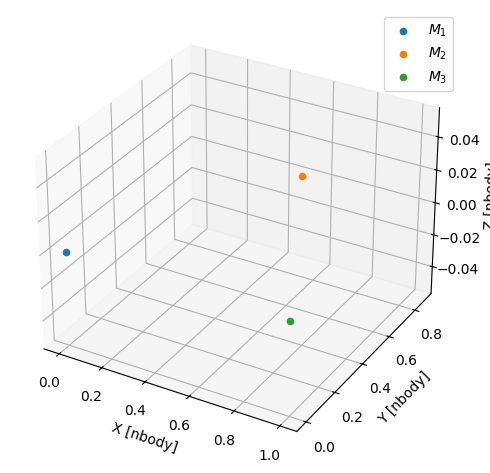

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(P.pos[0,0], P.pos[0,1], P.pos[0,2], label=f'$M_1$', color='C0')
ax.scatter(P.pos[1,0], P.pos[1,1], P.pos[1,2], label=f'$M_2$', color='C1')
ax.scatter(P.pos[2,0], P.pos[2,1], P.pos[2,2], label=f'$M_3$', color='C2')
ax.set_xlabel('X [nbody]')
ax.set_ylabel('Y [nbody]')
ax.set_zlabel('Z [nbody]')
plt.legend()

plt.tight_layout()
plt.show()

### TSUNAM EVOLUTION

Now we can evolve the system using the TSUNAMI integrator. 

As initial condition we put $t_{start} = 0$ and $t_{simulation} = t_{evolve} = 65$ defined previously. To perform the integration we devide this interval in $n = METTERE QUANTO$ parts linearly spaced.

### OTHER INTEGRATORS

Let's begin with the `euler_integrator` and let's use the `acceleration_pyfalcon`. These are the fastest among the other analogous competitors.

In [10]:
def integration_euler_adaptive(part, h, tsimulation, t, N, softening):
    path_1 = [part.pos[0]]
    path_2 = [part.pos[1]]
    path_3 = [part.pos[2]]
    time   = []
    time2  = []
    Etot_euler = []
    Ekin_euler = []
    Epot_euler = []

    while t < tsimulation:
        for j in range(N):
            result = integrator_euler(part, h, acceleration_pyfalcon, softening)
            updated_part, _, updated_acc, _, _ = result
            path_1.append(updated_part.pos[0])
            path_2.append(updated_part.pos[1])
            path_3.append(updated_part.pos[2])

            
            Etot_n, Ekin_n, Epot_n = updated_part.Etot_vett()
            Etot_euler.append(Etot_n)
            Ekin_euler.append(Ekin_n)
            Epot_euler.append(Epot_n)
            
        
        ts_1, _, _ = adaptive_timestep_r(part)
        h = ts_1
        time.append(h)
        t = t + h
        time2.append(t)

    path_1 = np.array(path_1)
    path_2 = np.array(path_2)
    path_3 = np.array(path_3)
    time   = np.array(time)
    time2  = np.array(time2)
    Etot_euler = np.array(Etot_euler)
    Ekin_euler = np.array(Ekin_euler)
    Etot_euler = np.array(Epot_euler)

    return path_1, path_2, path_3, time, time2, Etot_euler, Ekin_euler, Etot_euler

In [11]:
P_euler = P.copy()

h = 1
N = 3
t = 0
softening = 0

In [12]:
path_1_euler, path_2_euler, path_3_euler, time_euler, time2_euler, Etot_euler, Ekin_euler, Etot_euler = integration_euler_adaptive(P_euler, h, tevolve, t, N, softening)

In [13]:
print(path_1_euler)

[[   0.            0.            0.        ]
 [   0.            0.            0.        ]
 [   7.00013256    3.46422863    0.        ]
 ...
 [2731.75343821 1351.89144405    0.        ]
 [2734.4815177  1353.24151733    0.        ]
 [2737.20959718 1354.59159061    0.        ]]


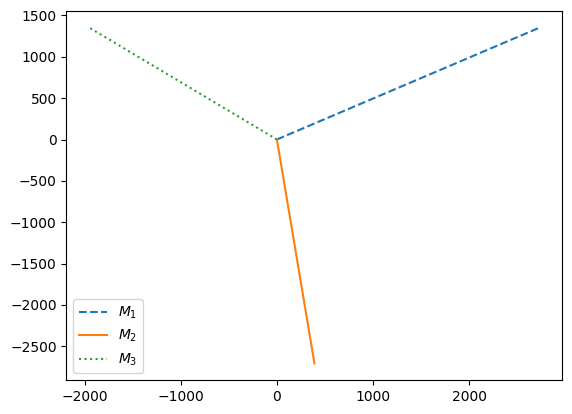

In [14]:
plt.figure()
plt.plot(path_1_euler[:,0]  , path_1_euler[:,1], label=f'$M_1$', linestyle='dashed' ) # , pos1_tsu[:,2])
plt.plot(path_2_euler[:,0]  , path_2_euler[:,1], label=f'$M_2$') # , pos2_tsu[:,2])
plt.plot(path_3_euler[:,0]  , path_3_euler[:,1], label=f'$M_3$', linestyle='dotted' ) # , pos3_tsu[:,2])
plt.legend()
plt.show()

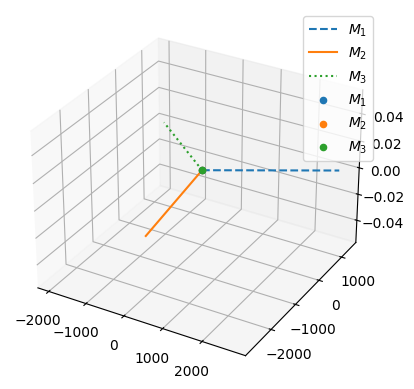

In [15]:
plt.figure()
ax = plt.axes(projection='3d')
plt.plot(path_1_euler[:,0], path_1_euler[:,1], path_1_euler[:,2], label=f'$M_1$', linestyle='dashed' ) # , pos1_tsu[:,2])
plt.plot(path_2_euler[:,0], path_2_euler[:,1], path_2_euler[:,2], label=f'$M_2$') # , pos2_tsu[:,2])
plt.plot(path_3_euler[:,0], path_3_euler[:,1], path_3_euler[:,2], label=f'$M_3$', linestyle='dotted' ) # , pos3_tsu[:,2])
ax.scatter(part_init.pos[0,0], part_init.pos[0,1], part_init.pos[0,2], label=f'$M_1$', color='C0')
ax.scatter(part_init.pos[1,0], part_init.pos[1,1], part_init.pos[1,2], label=f'$M_2$', color='C1')
ax.scatter(part_init.pos[2,0], part_init.pos[2,1], part_init.pos[2,2], label=f'$M_3$', color='C2')
plt.legend()
plt.show()